## Predicting the price for an Airbnb Host in Milan

Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its inception in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year.

In Italy, no city is more popular than Milan for tech industry as well as  for tourism industry. That implies that Milan is one of the hottest markets for Airbnb in Europe, with over 18,783 listings as of August 2020. With a size of 181.8 km², this means there are roughly 104 homes being rented out per km² in Berlin on Airbnb!

Considering the possibility that I might have to relocate for a new data science job, but want to keep my current flate (which is quite cheap!), I might wonder if it could be worth it to offer my jewel on Airbnb. Could this perhaps be a profitable option? However, it is difficult for potential hosts to know what the true value of their home is, and how in-demand their home might be. And since location and furniture are obviously fixed for the most part, is there anything else a host can influence - such as description, communication patterns, and/or additional services to boost their earnings?

The following question will drive this project:<br>
> **Can we determine a fairly spot-on daily price for a new accommodation that fits into its specific market environment and competitors in Milan?** <br>

The question focuses on the accommodation features and decisions a new host can make with regards to initial presentation, i.e. posting a picture of him- or herself on the website, determining a minimum length of stay, offering instant bookings etc. A machine learning algorithm will be applied to try to get an answer. 

### The dataset

In the first notebook, I will perform an analysis of the detailed Milan listings data, sourced from the Inside Airbnb website, in order to understand the rental landscape and try to recommend a price for a newbie entering the market. The dataset is named `listings.csv.gz` and was scraped on September 2nd 2020.

### 1. Obtaining and Viewing the Data 


In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import re
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None 

df_initial = pd.read_csv('C:/Users/Ankit Patel/Documents/GitHub/Milan Airbnb Prediction/dataset/listings.csv')

# checking shape
print("The dataset has {} rows and {} columns.".format(*df_initial.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df_initial.duplicated().sum()))

The dataset has 18783 rows and 74 columns.
It contains 0 duplicates.


In [3]:
df_initial.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20200831170621,2020-09-01,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,https://www.airbnb.com/users/show/13822,Francesca,2009-04-17,"Milan, Lombardia, Italy","I'm am Francesca Sottilaro, i live in Milan an...",NaN,NaN,50%,f,https://a0.muscache.com/im/users/13822/profile...,https://a0.muscache.com/im/users/13822/profile...,Zona 5,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Milan, Lombardy, Italy",TIBALDI,NaN,45.44195,9.17797,Private room in apartment,Private room,1,NaN,3.5 baths,3.0,1.0,"[""Elevator"", ""Host greets you"", ""Breakfast"", ""...",$100.00,4,5,4,4,5,5,4.0,5.0,NaN,t,23,53,83,358,2020-09-01,12,0,0,2010-04-19,2019-04-13,98.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.10
1,23986,https://www.airbnb.com/rooms/23986,20200831170621,2020-09-01,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,https://www.airbnb.com/users/show/95941,Jeremy,2010-03-19,"Milan, Lombardy, Italy","Hallo , I'm Jeremy Hayne I live in Milan and I...",within a day,100%,80%,f,https://a0.muscache.com/im/users/95941/profile...,https://a0.muscache.com/im/users/95941/profile...,Navigli,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,NAVIGLI,NaN,45.44991,9.17597,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Paid parking off premises"", ""Bed linens"", ""L...",$150.00,1,730,1,1,730,730,1.0,730.0,NaN,t,24,54,84,359,2020-09-01,14,1,0,2012-04-24,2019-09-02,92.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,f,1,1,0,0,0.14


In [4]:
# check the columns we currently have
df_initial.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
pd.options.display.max_rows = None
df_initial.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               11
description                                       408
neighborhood_overview                            7321
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           1
host_since                                          1
host_location                                      45
host_about                                       7803
host_response_time                               8744
host_response_rate                               8744
host_acceptance_rate                             4495
host_is_superhost                                   1
host_thumbnail_url          

### 2. Preprocessing the Data
#### 2.1. Deciding which columns to work with
Let's imagine we are in the shoes of someone who'd like to offer their home. Fixed features of our property include its rooms, size, and location. We also can decide on how we want to be listed: with a picture or not, how many minimum nights we want a guest to stay, whether we are instantly bookable, is there heater available, etc. But we can neither be a "super host", nor do we have any reviews yet to show - although they can be very important for setting a price. So, let's focus only on features we can influence:

In [6]:
# define the columns we want to keep
columns_to_keep = ['id', 'description','host_has_profile_pic',
                   'neighbourhood_cleansed', 'latitude','longitude', 'property_type', 'room_type', 'accommodates',
        'beds', 'amenities', 'price',
       'minimum_nights', 'has_availability',
       'number_of_reviews',
        'review_scores_rating', 'instant_bookable'
       ]
    

df_raw = df_initial[columns_to_keep].set_index('id')
print("The dataset has {} rows and {} columns - after dropping irrelevant columns.".format(*df_raw.shape))



The dataset has 18783 rows and 16 columns - after dropping irrelevant columns.


By the way, how many different **room types** do we have?

In [7]:
df_raw.room_type.value_counts(normalize=True)

Entire home/apt    0.746579
Private room       0.231592
Shared room        0.016132
Hotel room         0.005697
Name: room_type, dtype: float64

By the way, how many different **property type** do we have?

In [8]:
df_raw.property_type.value_counts(normalize=True)

Entire apartment                      0.624501
Private room in apartment             0.165256
Entire loft                           0.047756
Entire condominium                    0.045041
Private room in condominium           0.030879
Entire house                          0.014641
Shared room in apartment              0.010914
Private room in house                 0.010488
Entire serviced apartment             0.008572
Private room in loft                  0.006761
Private room in bed and breakfast     0.006069
Shared room in condominium            0.002822
Room in boutique hotel                0.002556
Private room in villa                 0.002289
Room in hotel                         0.002130
Room in serviced apartment            0.001757
Private room in serviced apartment    0.001650
Tiny house                            0.001597
Room in bed and breakfast             0.001544
Private room in guest suite           0.001278
Room in aparthotel                    0.001171
Entire villa 

#### 2.2. Cleaning Columns

In [9]:
df_raw['price'].head()

id
6400     $100.00
23986    $150.00
32119    $107.00
32649     $72.00
37256     $55.00
Name: price, dtype: object

Let's first check if there are any null values in the `price` column:

In [10]:
# checking Nan's in "price" column
df_raw.price.isna().sum()

0

No, so we don't need to drop any rows.

Let's remove the dollar signs in column and convert the string values into numerical ones:

In [11]:
# clean up the columns (by method chaining)
df_raw.price = df_raw.price.str.replace('$', '').str.replace(',', '').astype(float)

We shouldn't miss investigating the `price` - it might need some cleaning to be of use to us:

In [12]:
df_raw['price'].describe()

count    18783.000000
mean       112.952181
std        300.991564
min          8.000000
25%         50.000000
50%         73.000000
75%        110.000000
max      11164.000000
Name: price, dtype: float64

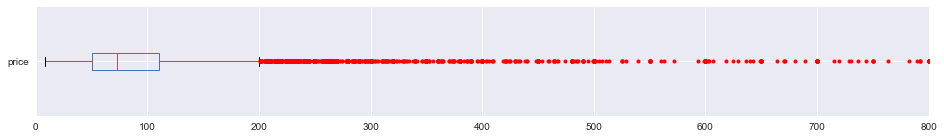

In [13]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df_raw['price'].plot(kind='box', xlim=(0, 800), vert=False, flierprops=red_square, figsize=(16,2));

A bit messy, as expected! 

75% of the apartments charge up to 112€ - but the maximum value is 11164€. Let's decide on a limit of 300€, after which the outliers seem to "fringe", and drop all records that charge more than that. Oddly enough, we have prices set to zero. So let's drop those records, too:

In [14]:
df_raw.drop(df_raw[ (df_raw.price > 300) | (df_raw.price == 0) ].index, axis=0, inplace=True)

In [15]:
df_raw['price'].describe()

count    18099.000000
mean        87.721450
std         55.863202
min          8.000000
25%         50.000000
50%         70.000000
75%        101.000000
max        300.000000
Name: price, dtype: float64

In [16]:
print("The dataset has {} rows and {} columns - after being price-wise preprocessed.".format(*df_raw.shape))

The dataset has 18099 rows and 16 columns - after being price-wise preprocessed.


#### 2.3. Dealing with Missing Values

In [17]:
pd.options.display.max_rows = None
df_raw.isna().sum()

description                390
host_has_profile_pic         1
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
beds                       102
amenities                    0
price                        0
minimum_nights               0
has_availability             0
number_of_reviews            0
review_scores_rating      4529
instant_bookable             0
dtype: int64

In [18]:
# drop columns with too many Nan's
#df_raw.drop(columns=['neighbourhood', 'bathrooms','neighbourhood_overview' ], inplace=True)

In [19]:
# drop rows with NaN's in bathrooms, host pic, discription, besds, and bedrooms
df_raw.dropna(subset=[  'host_has_profile_pic' ], inplace=True)

In [20]:
#df_raw.host_has_profile_pic.unique()
# replace host_has_profile_pic Nan's with no
#df_raw.host_has_profile_pic.fillna(value='f', inplace=True)
#df_raw.host_has_profile_pic.unique()

In [21]:
pd.options.display.max_rows = None
df_raw.isna().sum()

description                390
host_has_profile_pic         0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
beds                       102
amenities                    0
price                        0
minimum_nights               0
has_availability             0
number_of_reviews            0
review_scores_rating      4529
instant_bookable             0
dtype: int64

In [22]:
print("The dataset has {} rows and {} columns - after having dealt with missing values.".format(*df_raw.shape))

The dataset has 18098 rows and 16 columns - after having dealt with missing values.


***Predicting missing values with regression***

As calculated further up, 102 of our records still don't have a beds information. That means we have a problem! Dropping these records isn't an option as we would loose too much valuable information. Simply replacing it with the mean or median makes no sense. That leaves a third option: predict the missing value with a Machine Learning Algorithm. To not make it too complicated, we'll only use numerical features. Next, we have to split our data into 
- a) a training set where we have beds information and 
- b) a test set where we don't.

In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18098 entries, 6400 to 45217356
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   description             17708 non-null  object 
 1   host_has_profile_pic    18098 non-null  object 
 2   neighbourhood_cleansed  18098 non-null  object 
 3   latitude                18098 non-null  float64
 4   longitude               18098 non-null  float64
 5   property_type           18098 non-null  object 
 6   room_type               18098 non-null  object 
 7   accommodates            18098 non-null  int64  
 8   beds                    17996 non-null  float64
 9   amenities               18098 non-null  object 
 10  price                   18098 non-null  float64
 11  minimum_nights          18098 non-null  int64  
 12  has_availability        18098 non-null  object 
 13  number_of_reviews       18098 non-null  int64  
 14  review_scores_rating    13569 no

In [24]:
# filter out sub_df to work with
sub_df = df_raw[['accommodates', 'minimum_nights', 'beds',  'price']]

In [25]:
# split datasets
train_data = sub_df[sub_df['beds'].notnull()]
test_data  = sub_df[sub_df['beds'].isnull()]

# define X
X_train = train_data.drop('beds', axis=1)
X_test  = test_data.drop('beds', axis=1)

# define y
y_train = train_data['beds']

In [26]:
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (17996, 4)
Shape of Test Data:     (102, 4)

Shape of X_train: (17996, 3)
Shape of X_test: (102, 3)

Shape of y_train: (17996,)


In [27]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit model to training data
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
# making predictions
y_test = linreg.predict(X_test)

In [29]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['beds']
#y_test = round(y_test.columns)
print(y_test.shape)
y_test.head()

(102, 1)


,beds
0,1.210856
1,0.678685
2,1.210990
3,1.211233
4,1.210140


In [30]:
print(X_test.shape)
X_test.head()

(102, 3)


,accommodates,minimum_nights,price
id,,,
417903,2,2,50.0
429124,1,1,75.0
1215461,2,1,65.0
6048879,2,3,50.0
12888597,2,1,40.0


In [31]:
# make the index of X_test to an own dataframe
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)
y_test.head()

,beds
prelim,
417903,1.210856
429124,0.678685
1215461,1.210990
6048879,1.211233
12888597,1.210140


In [32]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [33]:
print(new_test_data.shape)
new_test_data.head()

(102, 4)


,accommodates,minimum_nights,price,beds
417903,2,2,50.0,1.210856
429124,1,1,75.0,0.678685
1215461,2,1,65.0,1.210990
6048879,2,3,50.0,1.211233
12888597,2,1,40.0,1.210140


In [34]:
new_test_data['beds'].isna().sum()

0

In [35]:
# combine train and test data back to a new sub df
sub_df_new = pd.concat([new_test_data, train_data], axis=0)

print(sub_df_new.shape)
sub_df_new.head()

(18098, 4)


,accommodates,minimum_nights,price,beds
417903,2,2,50.0,1.210856
429124,1,1,75.0,0.678685
1215461,2,1,65.0,1.210990
6048879,2,3,50.0,1.211233
12888597,2,1,40.0,1.210140


In [36]:
sub_df_new['beds'].isna().sum()

0

In [37]:
# prepare the multiple columns before concatening
df_raw.drop(['accommodates', 'minimum_nights', 'beds',  'price'], 
            axis=1, inplace=True)

In [38]:
# concate back to complete dataframe
sub_df_new=round(sub_df_new)
df = pd.concat([sub_df_new, df_raw], axis=1)

print(df.shape)
df.head(2)

(18098, 16)


,accommodates,minimum_nights,price,beds,description,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,has_availability,number_of_reviews,review_scores_rating,instant_bookable
6400,1,4,100.0,1.0,"Enjoy your stay at The Studio, a light-filled ...",t,TIBALDI,45.44195,9.17797,Private room in apartment,Private room,"[""Elevator"", ""Host greets you"", ""Breakfast"", ""...",t,12,98.0,f
23986,4,1,150.0,1.0,I look forward to welcoming you in my flat; it...,t,NAVIGLI,45.44991,9.17597,Entire apartment,Entire home/apt,"[""Paid parking off premises"", ""Bed linens"", ""L...",t,14,92.0,f


In [39]:
df['beds'].isna().sum()

0

In [40]:
df['beds'].describe()

count    18098.000000
mean         1.749254
std          1.119093
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: beds, dtype: float64

In [41]:
df.drop(df[ (df['beds'] == 0.) | (df['beds'] > 8.) ].index, axis=0, inplace=True)

In [42]:
print("The dataset has {} rows and {} columns - after being engineered.".format(*df.shape))

The dataset has 17577 rows and 16 columns - after being engineered.


#### 2.4. Feature Engineering 1: Distance to Centroid (Duomo di Milano) of Milan



Location is always an important factor in lodging services. To make it more descriptive, I decided to calculate each accommodation's distance to the so-called centroid (Duomo di Milano) of Milan instead of just relying on the neighbourhoods or areas. 

For our convenience, let's write a quick function that does this, apply it to each accommodation, and store the values in a new column:

In [43]:
from geopy.distance import great_circle

In [44]:
def distance_to_mid(lat, lon):
    milan_centre = ( 45.4641, 9.1919)
    accommodation = (lat, lon)
    return great_circle(milan_centre, accommodation).km

In [45]:
df['distance'] = df.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [46]:
df.head(2)

,accommodates,minimum_nights,price,beds,description,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,has_availability,number_of_reviews,review_scores_rating,instant_bookable,distance
6400,1,4,100.0,1.0,"Enjoy your stay at The Studio, a light-filled ...",t,TIBALDI,45.44195,9.17797,Private room in apartment,Private room,"[""Elevator"", ""Host greets you"", ""Breakfast"", ""...",t,12,98.0,f,2.692002
23986,4,1,150.0,1.0,I look forward to welcoming you in my flat; it...,t,NAVIGLI,45.44991,9.17597,Entire apartment,Entire home/apt,"[""Paid parking off premises"", ""Bed linens"", ""L...",t,14,92.0,f,2.008340


#### 2.5. Feature Engineering 2: Lodging Size

One of the most important pieces of information for predicting the rate is the size. Since there is no `size` column so we need to see if any other column is enough to provide infor mation about the size. (Besides, size in Italy can expressed in square meters, square feet, m2, mq, etc.)

Let's check, if the column `description` reveals any information about size instead: 

In [47]:
#list(df.description[:10])

In [48]:
df.description.isna().sum()

363

The `description` column seems to be rich in content. Let's extract 
- all double-digit or three-digit numbers 
- that are followed by one of the first characters is "s" or "m" (covering "sqm", "square meters", "m2" etc.) with to make sure that second character would "q" or "2" (to eliminate posibility of word "minute') 
- may or may not be connected by white space. 

Single- or more than three-digit numbers for accommodation sizes are quite unlikely.

I know, it's a bold move - but let's give it a try...

***Extracting size from text***

In [49]:
# extract numbers 
df['size'] = df['description'].str.extract('(\d{2,3}\s?[smSM][q2Q])', expand=True)
df['size'] = df['size'].str.replace("\D", "")

# change datatype of size into float
df['size'] = df['size'].astype(float)

print('NaNs in size_column absolute:     ', df['size'].isna().sum())
print('NaNs in size_column in percentage:', round(df['size'].isna().sum()/len(df),3), '%')

NaNs in size_column absolute:      14869
NaNs in size_column in percentage: 0.846 %


In [50]:
df[['description', 'size']].head(10)

,description,size
6400,"Enjoy your stay at The Studio, a light-filled ...",NaN
23986,I look forward to welcoming you in my flat; it...,NaN
32119,<b>The space</b><br />Do you visit Milan for s...,NaN
32649,Larger group can book Red and Pink (rooms/4653...,50.0
37256,"COZY, FULLY FURNISHED, PRIVATE STUDIO IN THE C...",NaN
40470,<b>The space</b><br />If you want to visit Mil...,NaN
46536,1) Russian people will have 10% off on site (s...,NaN
52181,<b>The space</b><br />Modern and elegant two-r...,55.0
55055,<b>The space</b><br />NICE 2 BEDROOM ATTIC IN...,NaN
59226,The flat is in a recently restructured condomi...,NaN


Comparing the results, we noticed that out of 18098 only 2785 descriptions contains information about size which are not much usefull for us in this case. So we will try something new ! We genrally know that when we travel usally start to find Airbnb near main tourist attraction.Duomo di milan is in zone 1 and it's one of the main attraction. Let see how distance from centroid of milan plays role in price prediction. 

In [51]:
# drop description column
df.drop(['description'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17577 entries, 6400 to 45217356
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            17577 non-null  int64  
 1   minimum_nights          17577 non-null  int64  
 2   price                   17577 non-null  float64
 3   beds                    17577 non-null  float64
 4   host_has_profile_pic    17577 non-null  object 
 5   neighbourhood_cleansed  17577 non-null  object 
 6   latitude                17577 non-null  float64
 7   longitude               17577 non-null  float64
 8   property_type           17577 non-null  object 
 9   room_type               17577 non-null  object 
 10  amenities               17577 non-null  object 
 11  has_availability        17577 non-null  object 
 12  number_of_reviews       17577 non-null  int64  
 13  review_scores_rating    13183 non-null  float64
 14  instant_bookable        17577 no

In [53]:
# filter out sub_df to work with
sub_df = df[['accommodates', 'beds',  'price', 'minimum_nights','distance', 'size']]

In [54]:
# split datasets
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

# define X
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

# define y
y_train = train_data['size']

In [55]:
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (2708, 6)
Shape of Test Data:     (14869, 6)

Shape of X_train: (2708, 5)
Shape of X_test: (14869, 5)

Shape of y_train: (2708,)


In [56]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit model to training data
linreg.fit(X_train, y_train)

LinearRegression()

In [57]:
# making predictions
y_test = linreg.predict(X_test)

In [58]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']
print(y_test.shape)
y_test.head()

(14869, 1)


,size
0,104.698452
1,120.857792
2,145.862915
3,100.492852
4,157.237295


In [59]:
print(X_test.shape)
X_test.head()

(14869, 5)


,accommodates,beds,price,minimum_nights,distance
6400,1,1.0,100.0,4,2.692002
23986,4,1.0,150.0,1,2.008340
32119,4,4.0,107.0,3,6.662219
37256,1,1.0,55.0,2,1.310240
40470,4,4.0,182.0,3,6.912814


In [60]:
# make the index of X_test to an own dataframe
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)
y_test.head()

,size
prelim,
6400,104.698452
23986,120.857792
32119,145.862915
37256,100.492852
40470,157.237295


In [61]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [62]:
new_test_data['size'].isna().sum()

0

In [63]:
# combine train and test data back to a new sub df
sub_df_new = pd.concat([new_test_data, train_data], axis=0)

print(sub_df_new.shape)
sub_df_new.head()

(17577, 6)


,accommodates,beds,price,minimum_nights,distance,size
6400,1,1.0,100.0,4,2.692002,104.698452
23986,4,1.0,150.0,1,2.008340,120.857792
32119,4,4.0,107.0,3,6.662219,145.862915
37256,1,1.0,55.0,2,1.310240,100.492852
40470,4,4.0,182.0,3,6.912814,157.237295


In [64]:
sub_df_new['size'].isna().sum()

0

In [65]:
# prepare the multiple columns before concatening
df.drop(['accommodates', 'beds',  'price', 'minimum_nights','distance', 'size'], 
            axis=1, inplace=True)


In [66]:
# concate back to complete dataframe
sub_df_new=round(sub_df_new)
df_new = pd.concat([sub_df_new, df], axis=1)

print(df_new.shape)
df_new.head(2)

(17577, 17)


,accommodates,beds,price,minimum_nights,distance,size,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,has_availability,number_of_reviews,review_scores_rating,instant_bookable
6400,1,1.0,100.0,4,3.0,105.0,t,TIBALDI,45.44195,9.17797,Private room in apartment,Private room,"[""Elevator"", ""Host greets you"", ""Breakfast"", ""...",t,12,98.0,f
23986,4,1.0,150.0,1,2.0,121.0,t,NAVIGLI,45.44991,9.17597,Entire apartment,Entire home/apt,"[""Paid parking off premises"", ""Bed linens"", ""L...",t,14,92.0,f


In [67]:
df_new['size'].isna().sum()

0

In [68]:
df_new['size'].describe()

count    17577.000000
mean       118.245150
std         82.319169
min          0.000000
25%         98.000000
50%        110.000000
75%        126.000000
max       2002.000000
Name: size, dtype: float64

In [69]:
df_new.drop(df_new[ (df_new['size'] == 0.) | (df_new['size'] > 300.) ].index, axis=0, inplace=True)

In [70]:
print("The dataset has {} rows and {} columns - after being engineered.".format(*df_new.shape))

The dataset has 17347 rows and 17 columns - after being engineered.


#### 2.6. Feature Engineering 3: Lodging Amenities

I'm interested in what amenities hosts offer their guests, and in order to enrich our prediction, whether we can determine what some of the more special and/or rare amenities might be that make a property more desirable.

In [71]:
from collections import Counter

In [72]:
results = Counter()
df_new['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[(' Heating', 16553),
 (' Essentials', 16163),
 (' Kitchen', 14959),
 (' Wifi', 14718),
 (' Hair dryer]', 14711),
 (' Washer', 13627),
 (' TV', 13368),
 (' Hangers', 13075),
 (' Iron', 12422),
 (' Shampoo', 12199),
 (' Air conditioning', 10638),
 (' Hot water', 10575),
 (' Laptop-friendly workspace', 8968),
 (' Dishes and silverware', 8670),
 (' Cooking basics', 7290),
 (' Bed linens', 6944),
 (' Stove', 6868),
 (' Refrigerator', 6699),
 (' Coffee maker', 6347),
 (' Oven', 6039),
 (' Microwave', 5356),
 (' Elevator', 5352),
 (' Dishwasher', 4658),
 (' Extra pillows and blankets', 4268),
 (' First aid kit', 4193),
 (' Private entrance', 4041),
 ('[Elevator', 3960),
 (' Long term stays allowed', 3723),
 (' Free street parking', 3663),
 (' Patio or balcony', 3494)]

In [73]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

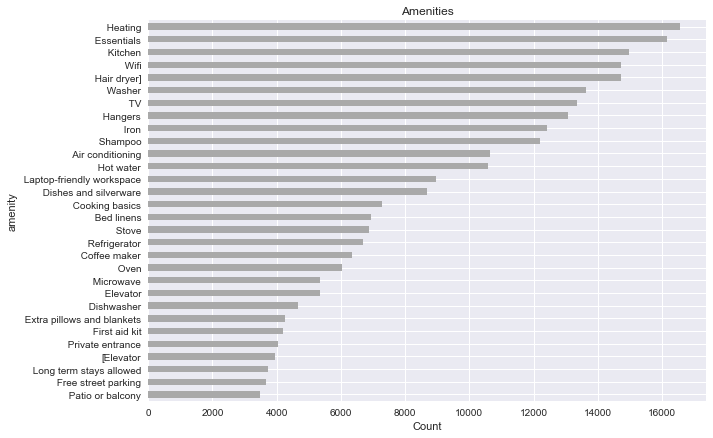

In [74]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

Let's add columns with amenities that are somewhat unique and not offered by all hosts: 
- a Heating
- a TV
- Wifi
- Kitchen
- Essentials and
- Hair dryer.

After doing this, let's drop the original column:

In [75]:
df_new['Heating'] = df_new['amenities'].str.contains('Heating')
df_new['TV'] = df_new['amenities'].str.contains('TV')
df_new['Wifi'] = df_new['amenities'].str.contains('Wifi')
df_new['Kitchen'] = df_new['amenities'].str.contains('Kitchen')
df_new['Essentials'] = df_new['amenities'].str.contains('Essentials')
df_new['Hair dryer'] = df_new['amenities'].str.contains('Hair dryer')

In [76]:
df_new.drop(['amenities'], axis=1, inplace=True)

### 3. Exploratory Data Analysis (EDA)

**> Price Differences on a Map**

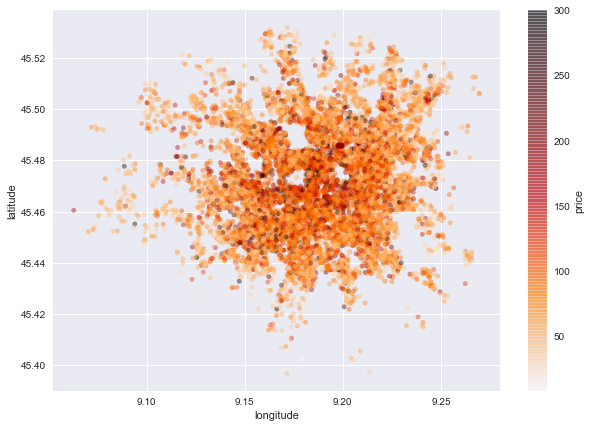

In [77]:
df_new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

**> Price Differences by Neighbourhood**

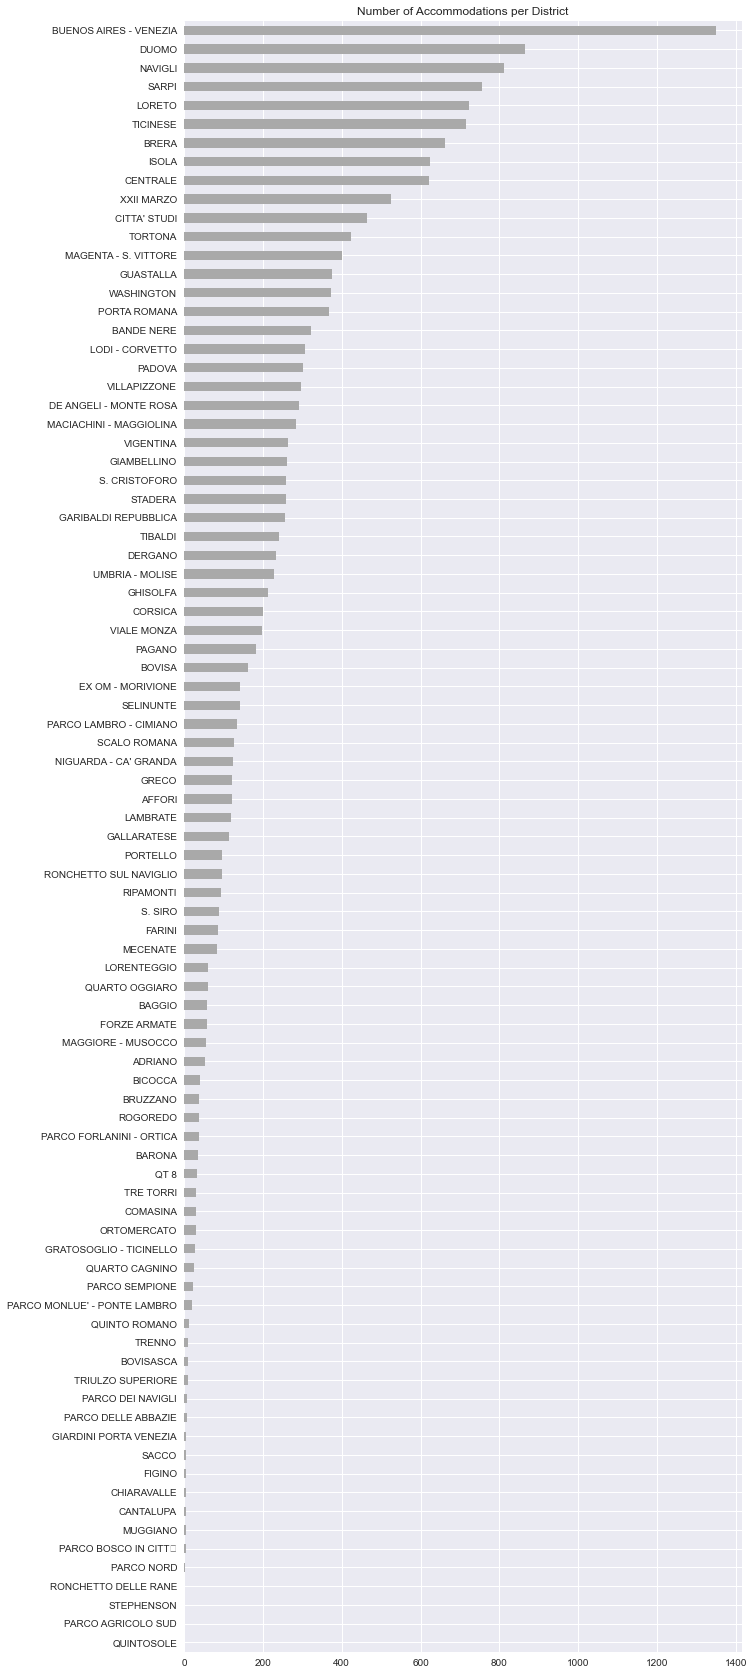

In [78]:
df_new['neighbourhood_cleansed'].value_counts().sort_values().plot(kind='barh',figsize=(10,30), color='darkgrey')
plt.title('Number of Accommodations per District');

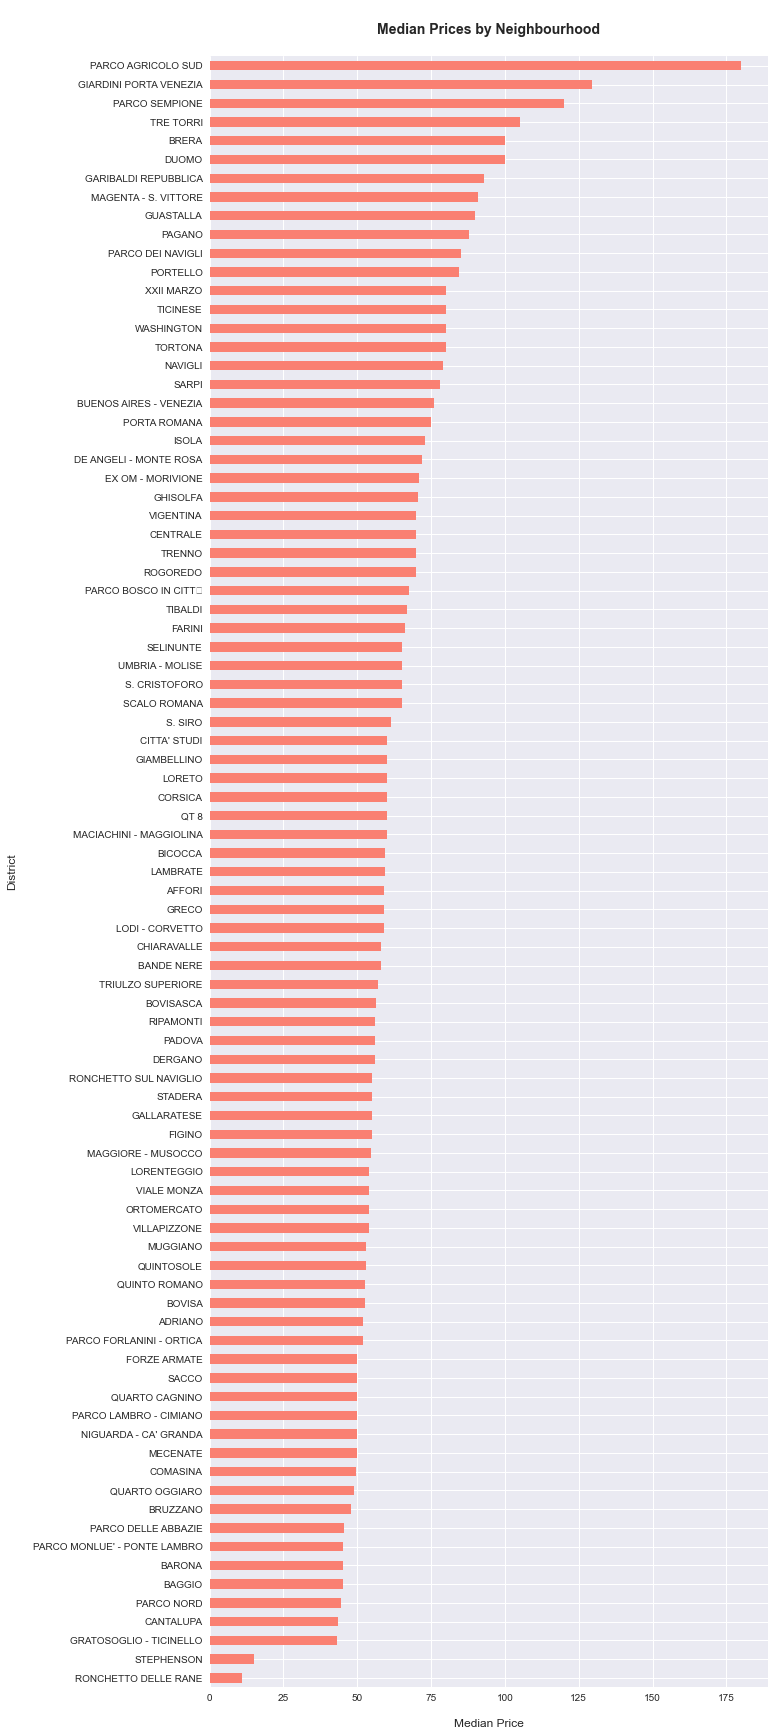

In [79]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_new_grouped = pd.DataFrame(df_new.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df_new_grouped.reset_index(inplace=True)

# plot this 
df_new_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(10,30), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

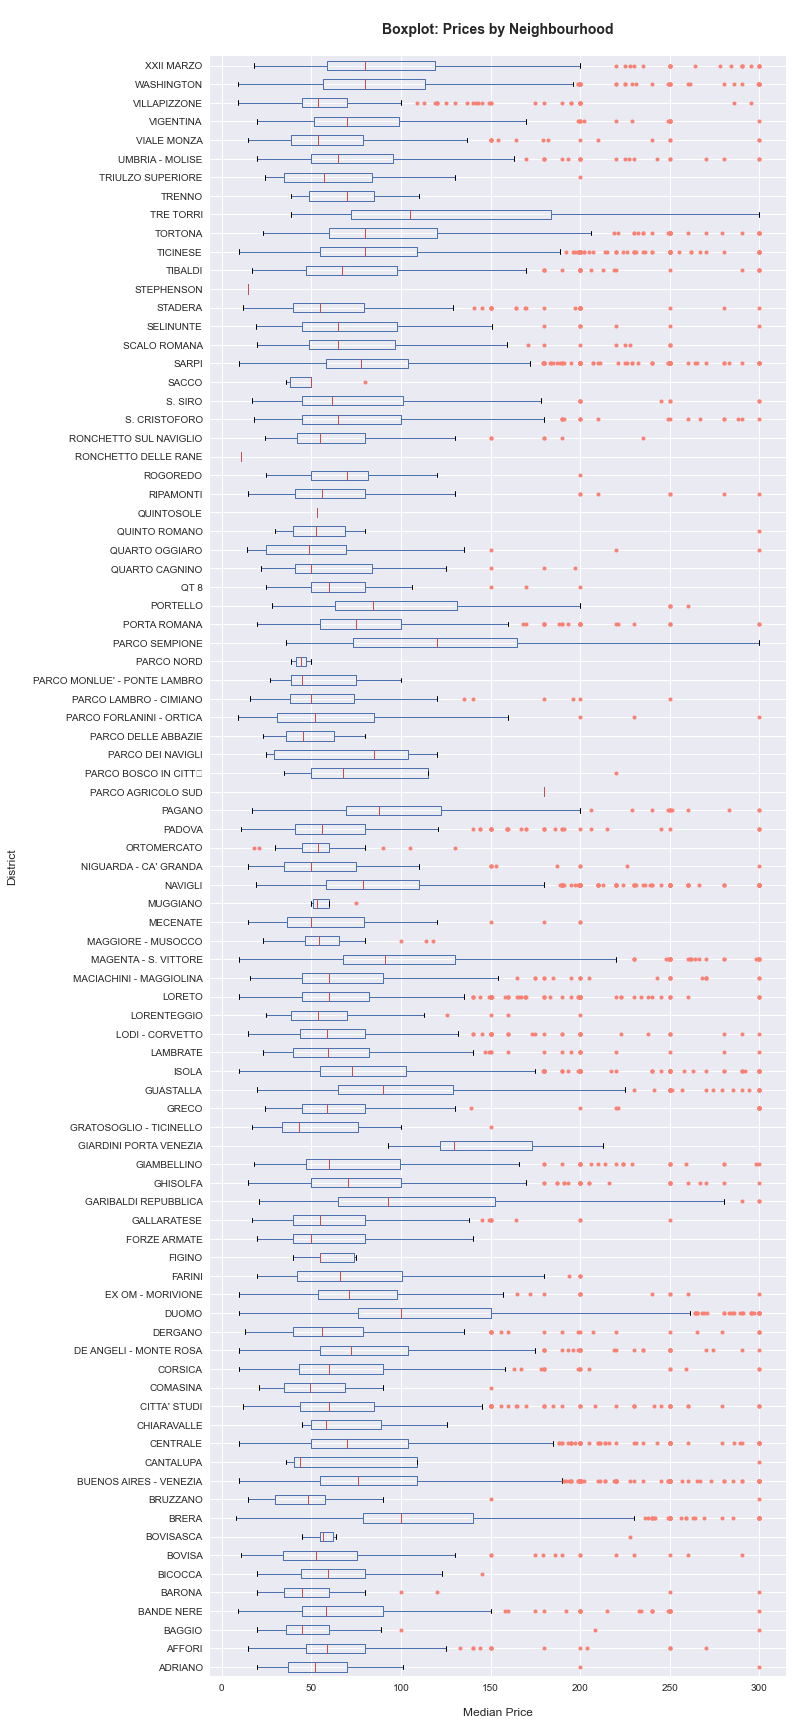

In [80]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df_new.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,30))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

**> Price Differences by Accommodation Distance to Center of Berlin**

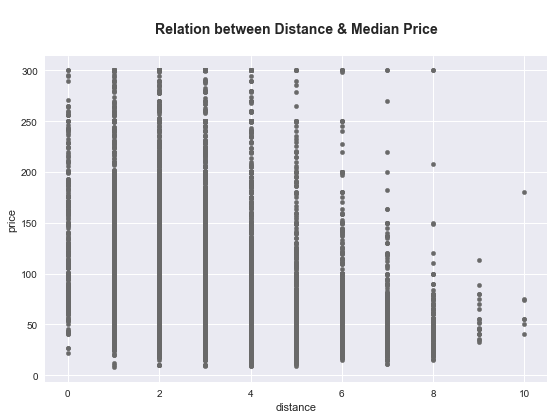

In [81]:
df_new.plot.scatter(x="distance", y="price", figsize=(9,6), c='dimgrey')
plt.title('\nRelation between Distance & Median Price\n', fontsize=14, fontweight='bold');

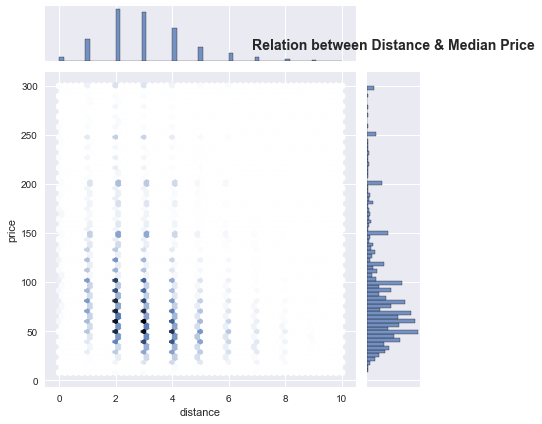

In [82]:
sns.jointplot(x=df_new["distance"], y=df_new["price"], kind='hex')
plt.title('\nRelation between Distance & Median Price\n', fontsize=14, fontweight='bold');

**> Price Differences by Number of beds**

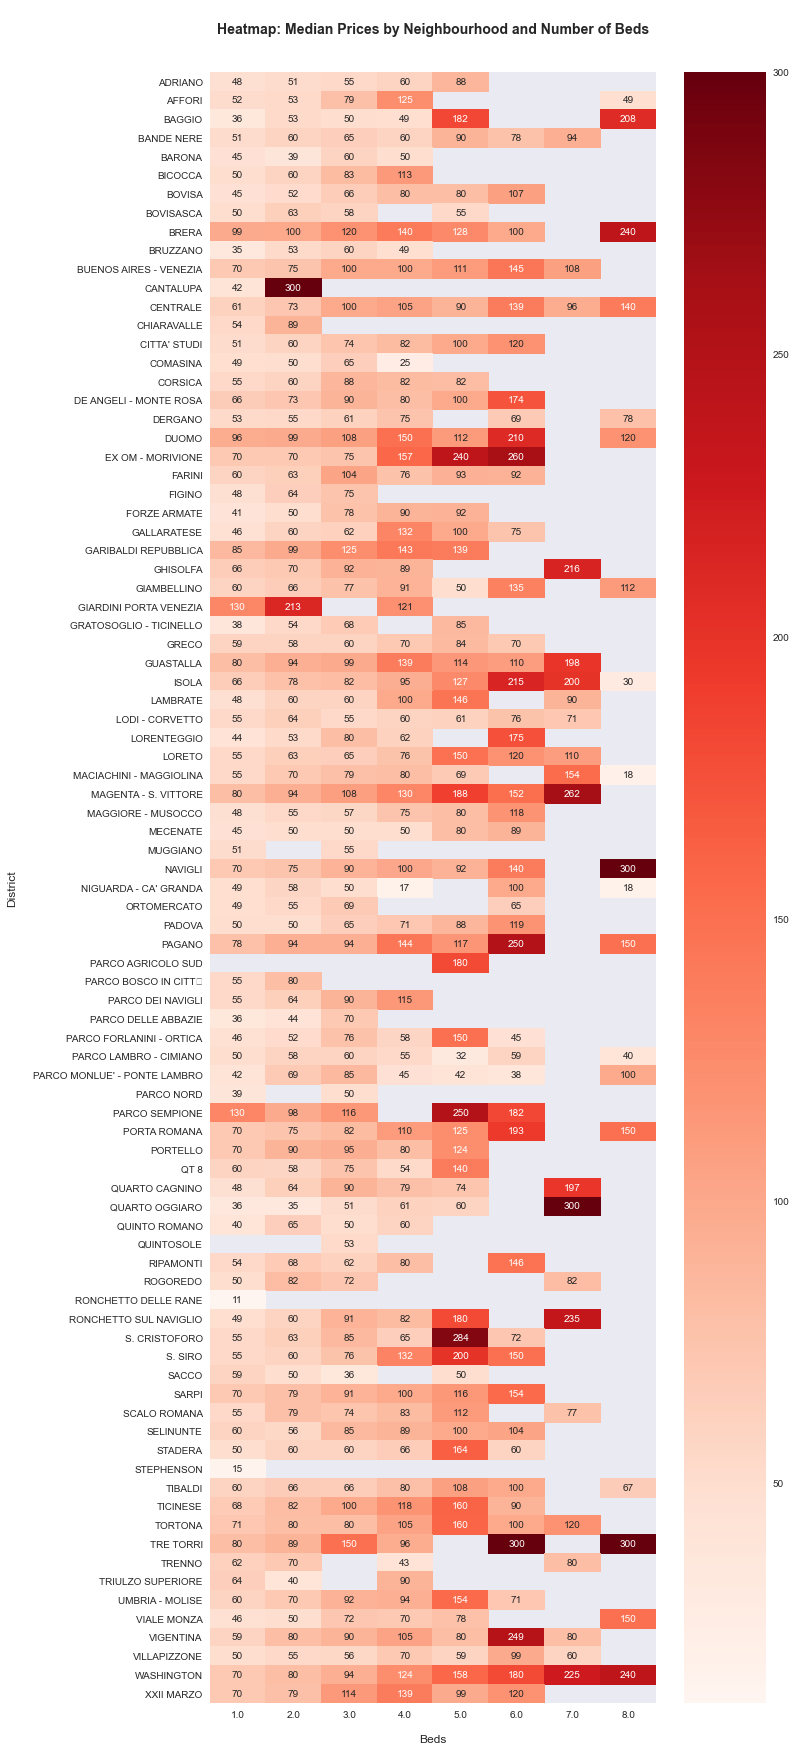

In [83]:
plt.figure(figsize=(10,30))
sns.heatmap(df_new.groupby(['neighbourhood_cleansed', 'beds']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBeds', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Beds\n\n', fontsize=14, fontweight='bold');

### 4. Modeling the Data

#### 4.1. Preparing Target and Features

In [85]:
df_new.columns

Index(['accommodates', 'beds', 'price', 'minimum_nights', 'distance', 'size',
       'host_has_profile_pic', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'Heating', 'TV', 'Wifi', 'Kitchen', 'Essentials', 'Hair dryer'],
      dtype='object')

In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17347 entries, 6400 to 45217356
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            17347 non-null  int64  
 1   beds                    17347 non-null  float64
 2   price                   17347 non-null  float64
 3   minimum_nights          17347 non-null  int64  
 4   distance                17347 non-null  float64
 5   size                    17347 non-null  float64
 6   host_has_profile_pic    17347 non-null  object 
 7   neighbourhood_cleansed  17347 non-null  object 
 8   latitude                17347 non-null  float64
 9   longitude               17347 non-null  float64
 10  property_type           17347 non-null  object 
 11  room_type               17347 non-null  object 
 12  has_availability        17347 non-null  object 
 13  number_of_reviews       17347 non-null  int64  
 14  review_scores_rating    13005 no

Now let's convert all string columns into categorical ones:

In [87]:
df_new.drop([ 'neighbourhood_cleansed','beds','host_has_profile_pic',
     'property_type', 
      'has_availability', 'review_scores_rating',
      'instant_bookable',  'number_of_reviews', 'TV', 'Wifi', 'Kitchen', 'accommodates',
      'Essentials', 'Hair dryer'], axis=1, inplace=True)

In [88]:
for col in [ 'room_type', 'Heating', 'price']:
    df_new[col] = df_new[col].astype('category')

In [89]:
# define our target
target = df_new[["price"]].astype('float64')

# define our features 
features = df_new.drop(["price"], axis=1)
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17347 entries, 6400 to 45217356
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17347 non-null  float64
dtypes: float64(1)
memory usage: 271.0 KB


***Recoding Categorical Features***

Machine learning algorithms generally need all data - including categorical data - in numeric form. To satisfy these algorithms, categorical features are converted into separate binary features called dummy variables. Therefore, we have to find a way to represent these variables as numbers before handing them off to the model. One typical way of doing this in one-hot encoding, which creates a new column for each unique category in a categorical variable. Each observation receives a 1 in the column for its corresponding category (= "HOT") and a 0 in all other new columns. To conduct one-hot encoding, we use the pandas get_dummies function.

In [90]:
num_feats = features.select_dtypes(include=['float64', 'int64', 'bool']).copy()

# one-hot encoding of categorical features
cat_feats = features.select_dtypes(include=['category']).copy()
cat_feats = pd.get_dummies(cat_feats)

In [91]:
features_recoded = pd.concat([num_feats, cat_feats], axis=1)

In [92]:
print(features_recoded.shape)


(17347, 11)


In [93]:
features_recoded.head(20)

,minimum_nights,distance,size,latitude,longitude,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,Heating_False,Heating_True
6400,4,3.0,105.0,45.44195,9.17797,0,0,1,0,0,1
23986,1,2.0,121.0,45.44991,9.17597,1,0,0,0,0,1
32119,3,7.0,146.0,45.51988,9.22310,1,0,0,0,0,1
32649,3,7.0,50.0,45.51942,9.22615,1,0,0,0,0,1
37256,2,1.0,100.0,45.47074,9.20578,0,0,1,0,0,1
40470,3,7.0,157.0,45.52111,9.22727,1,0,0,0,0,1
46536,3,7.0,157.0,45.52213,9.22693,1,0,0,0,0,1
52181,4,8.0,55.0,45.46443,9.09046,1,0,0,0,0,1
55055,3,3.0,117.0,45.48055,9.21629,1,0,0,0,0,1
59226,2,2.0,111.0,45.48263,9.19674,1,0,0,0,0,1


In [94]:
features_recoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17347 entries, 6400 to 45217356
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17347 non-null  int64  
 1   distance                   17347 non-null  float64
 2   size                       17347 non-null  float64
 3   latitude                   17347 non-null  float64
 4   longitude                  17347 non-null  float64
 5   room_type_Entire home/apt  17347 non-null  uint8  
 6   room_type_Hotel room       17347 non-null  uint8  
 7   room_type_Private room     17347 non-null  uint8  
 8   room_type_Shared room      17347 non-null  uint8  
 9   Heating_False              17347 non-null  uint8  
 10  Heating_True               17347 non-null  uint8  
dtypes: float64(4), int64(1), uint8(6)
memory usage: 914.8 KB


#### 4.2. Splitting and Scaling the Data

In [95]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# split our data
X_train, X_test, y_train, y_test = train_test_split(features_recoded, target, test_size=0.2)

One of the challenges in building models is mixing features that have different scales. Look at our dataset and compare bathrooms with size or maximum_nights. When we mix units with ranges that have different orders of magnitude, our models may not be able to find the proper coefficients. To account for this problem, we standardize or normalize the features.

In [96]:
# scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(y_train.columns)
y_train.info()


Index(['price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13877 entries, 1834427 to 37236987
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   13877 non-null  float64
dtypes: float64(1)
memory usage: 216.8 KB


#### 4.3. Training an XGBoost Regressor

In [97]:
# create a baseline
booster = xgb.XGBRegressor()

Some of the important hyperparameters to tune an XGBoost are:
- `n_estimators` $\;\;\;\;\;$ = Number of trees one wants to build.
- `learning_rate` $\;\;\;\;$= Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.
- `max_depth` $\;\;\;\;\;\;\;\;\;\;\;$= Determines how deeply each tree is allowed to grow during any boosting round.
- `colsample_bytree` = Percentage of features used per tree. 
- `gamma` $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$= Specifies the minimum loss reduction required to make a split.

In [98]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}


In [99]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, 
                           max_depth=7, n_estimators=150, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [100]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

RMSE: 42.8671


In [101]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.4052


#### 4.4. Cross Validation

In order to build more robust models, it is common to conduct a k-fold cross validation where all the entries in the original training dataset are used for both training and validation. XGBoost supports k-fold cross validation via the cv method. All we have to do is specify the `nfolds` parameter, which is the number of cross validation rounds you want to build. 

Also, it supports many other parameters:
- `num_boost_round` $\;\;\;\;\;\;\;\;$ = Specifies the number of trees to build (analogous to n_estimators).
- `metrics` $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ = Specifies the evaluation metrics to be checked during CV.
- `as_pandas` $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$= Returns the results in a decent pandas DataFrame.
- `early_stopping_rounds` = Finishes model training early if the hold-out metric does not improve for a given number of rounds. 

We will have to first convert the dataset into an optimized data structure called DMatrix so that XGBoost's cross validation method is supported.

In [102]:
xg_train = xgb.DMatrix(data=X_train, label=y_train)

In [103]:
params = {'colsample_bytree':0.6, 'gamma':0.2, 'learning_rate':0.05, 'max_depth':6}

cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

In [104]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,99.315501,0.220018,99.346868,0.456091
1,95.506755,0.050769,95.569583,0.627004
2,92.022992,0.105343,92.099775,0.714706
3,88.629588,0.222781,88.732979,0.661083
4,85.634954,0.224735,85.768392,0.660279


In [105]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
120,38.473384,0.262242,43.954866,0.390509
121,38.454545,0.253052,43.955090,0.391065
122,38.406694,0.269116,43.947792,0.384078
123,38.387285,0.269313,43.948728,0.385858
124,38.354408,0.257415,43.942137,0.385187


### 5. Interpreting the Data

We can see that our average error (RMSE) in the initial XGBoost is around 22€, which improves to 17.5€ by cross validation. Given the fact that after cleaning up the price column, 50% of our lodgings cost only up to 45€ and 75% of our lodgings up to 70€ - even the improved standard deviation of 17€ is quite a massive inaccuracy that doesn't help much in recommending a price.

It turns out that the price is dependent not only on geography, size, and features. It stands to reason that 
- the quality of presentation (e.g. pictures), 
- availability, 
- the number and content of reviews, 
- communication (e.g. acceptance rate, host response time) or 
- status ((whether or not the host is a super host)) 

might have a substantial influence too. But the purpose of this analysis was to recommend a price to a "rookie" without any reviews or status. With this in mind, we might say that we can't recommend an exact price, but rather a range..

The next step (and maybe an idea for the reader) would be to start all over again and include the features mentioned above to try to find out if accuracy improves. That might help a beginner on Airbnb better know what price to aim for.

With what we have done here, we have explained 71% of the variance (R^2) with the most important accommodation features, as pictured below:

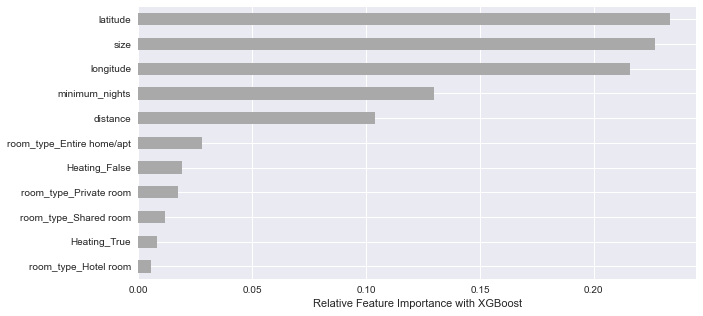

In [106]:
# plot the important features
feat_importances = pd.Series(booster.feature_importances_, index=features_recoded.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

* As we see, the **most important features are size, minimum nights, and locatoin**, which account for approximately 45% of the daily price. Other top features are the number of people the apartment distance.

### 6. Appendix 

## For further updates of this Kernel check into this GitHub Link: https://github.com/ankitpatel1661/Milan-Airbnb-Predicting-Prices


All resources used in this notebook are listed below.

Data
- http://insideairbnb.com/get-the-data.html

Imputing missing values with Linear Regression
- https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

XGBoost
- https://www.datacamp.com/community/tutorials/xgboost-in-python
- https://www.kaggle.com/marcelo06/cross-validation-with-xgboost-python

Geocoding
- https://pypi.org/project/geopy/

Visualizations
- https://python-graph-gallery.com
- https://www.kaggle.com/kostyabahshetsyan/boston-airbnb-visualization

Inspiration for Analysis
- https://towardsdatascience.com/digging-into-airbnb-data-reviews-sentiments-superhosts-and-prices-prediction-part1-6c80ccb26c6a
- https://www.kaggle.com/ibjohnsson/predicting-listing-prices
- https://www.kaggle.com/mathvv/prediction-on-house-prices-xgboost-tutorial
- https://towardsdatascience.com/improving-airbnb-yield-prediction-with-text-mining-9472c0181731
- https://github.com/joaeechew/airbnb_nlp/blob/master/Capstone%20Project.ipynb


>  # <font color='orange'> Please UPVOTE if you found these helpful :) </font>